In [5]:
import numpy as np
import matplotlib.pyplot as plt

15
72
[ 1  4  8  9 15]


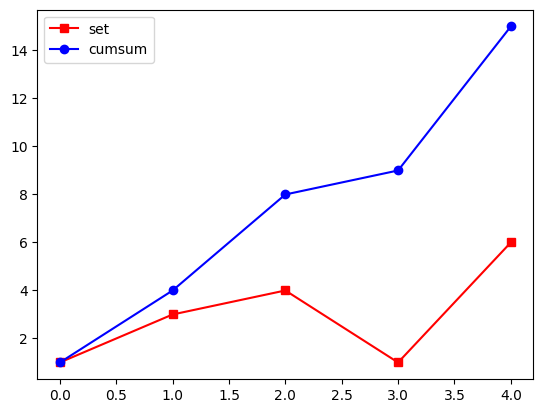

In [8]:
lst = [1,3,4,1,6]

print(np.sum(lst))
print(np.prod(lst))
print(np.cumsum(lst))

plt.plot(lst,'rs-')
plt.plot(np.cumsum(lst),'bo-')

plt.legend(['set','cumsum'])

plt.show()